<a href="https://colab.research.google.com/github/r1one-22/FSD/blob/main/Dimensionality-Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
#Load dataset
df = pd.read_csv("/content/E-commerce Customer Behavior.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
# Pilih fitur numerik relevan
# (Disesuaikan dengan dataset kamu)

features = [
    "Age",
    "Total Spend",
    "Items Purchased",
    "Average Rating",
    "Days Since Last Purchase"
]

X = df[features]


In [ ]:
# Cek missing value
print("\nMissing value tiap kolom:")
print(X.isnull().sum())


Missing value tiap kolom:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
dtype: int64


In [ ]:
#Jika ada missing value, hapus
X = X.dropna()

In [ ]:
# Standarisasi data
# (untuk PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Terapkan PCA (2 komponen)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

print(f"Explained variance by PC1 and PC2: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.2f}")

Explained variance by PC1 and PC2: [0.7422501  0.17201217]
Total explained variance: 0.91


In [ ]:
#untuk mengecek dan membandingkan ukuran (dimensi) data sebelum dan sesudah dilakukan PCA.
print(f"\nOriginal shape: {X_scaled.shape}")
print(f"Reduced shape (2D PCA): {X_pca.shape}")


Original shape: (350, 5)
Reduced shape (2D PCA): (350, 2)


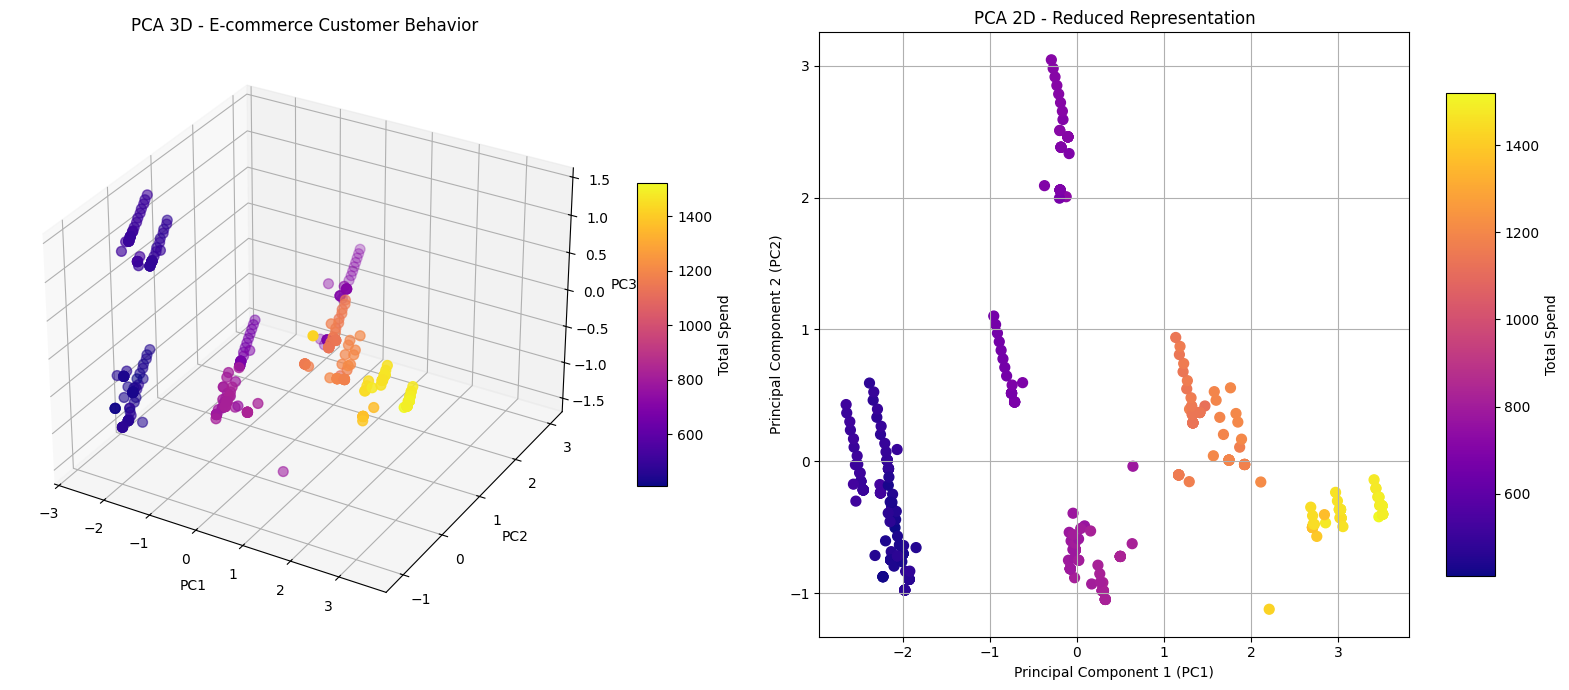

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# ===============================
# PCA 3D untuk visualisasi "data asli"
# ===============================
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Gunakan fitur asli sebagai warna
color_feature = df.loc[X.index, "Total Spend"]

fig = plt.figure(figsize=(16, 7))

# ===============================
# Subplot 1: PCA 3D
# ===============================
ax1 = fig.add_subplot(121, projection='3d')

scatter1 = ax1.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=color_feature,
    cmap='plasma',
    s=50
)

ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax1.set_title("PCA 3D - E-commerce Customer Behavior")

fig.colorbar(
    scatter1,
    ax=ax1,
    shrink=0.5,
    aspect=10,
    label="Total Spend"
)

# ===============================
# Subplot 2: PCA 2D
# ===============================
ax2 = fig.add_subplot(122)

scatter2 = ax2.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=color_feature,
    cmap='plasma',
    s=50
)

ax2.set_xlabel("Principal Component 1 (PC1)")
ax2.set_ylabel("Principal Component 2 (PC2)")
ax2.set_title("PCA 2D - Reduced Representation")
ax2.grid(True)

fig.colorbar(
    scatter2,
    ax=ax2,
    shrink=0.8,
    aspect=10,
    label="Total Spend"
)

plt.tight_layout()
plt.show()



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


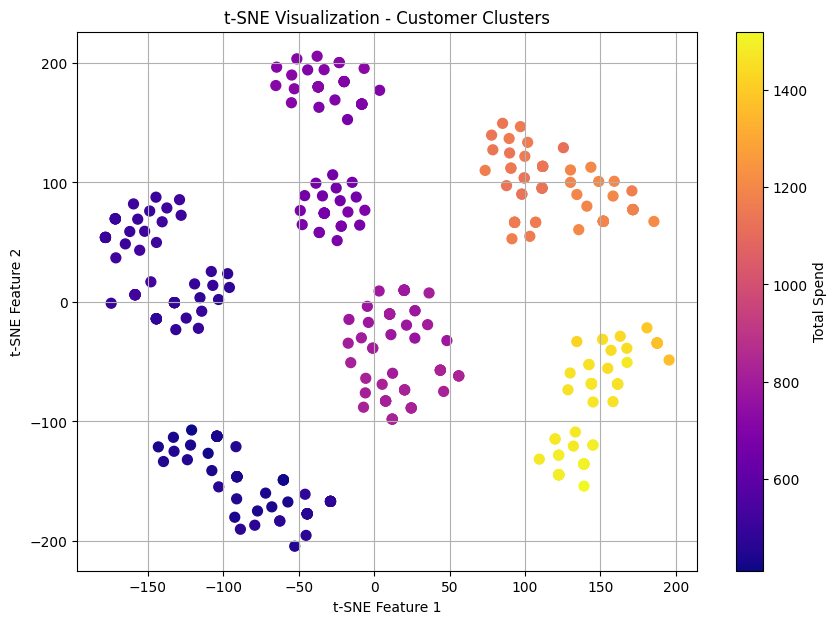

In [ ]:
from sklearn.manifold import TSNE

# ===============================
# Implementasi t-SNE
# ===============================
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=color_feature,
    cmap='plasma',
    s=50
)
plt.colorbar(scatter_tsne, label="Total Spend")
plt.title("t-SNE Visualization - Customer Clusters")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.grid(True)
plt.show()